In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# let's drop some columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# #Mapping/Encoding the 'Gender' and 'Embarked' Features
df['Sex']=df['Sex'].map({'male': 0, 'female': 1})
df['Embarked']=df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [11]:
display(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0
887,1,1,1,19.0,0,0,30.0000,2.0
888,0,3,1,NaN,1,2,23.4500,2.0
889,1,1,0,26.0,0,0,30.0000,0.0


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
#Dealing with Missing Values in 'Age' and 'Embarked'
df.fillna({'Age':df['Age'].mean(),'Embarked': 1}, inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

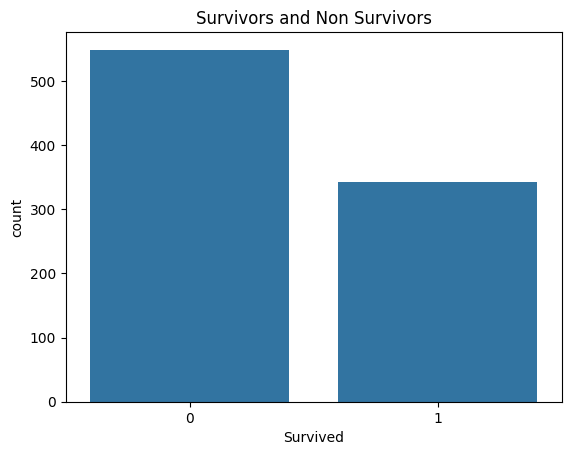

In [15]:
#Survivors and Non Survivors Graph
sns.countplot(x='Survived', data=df)
plt.title('Survivors and Non Survivors')
plt.show()

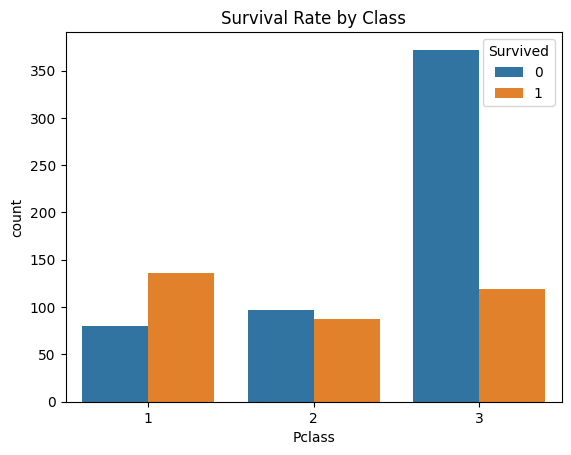

In [16]:
#Survival Rate by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()


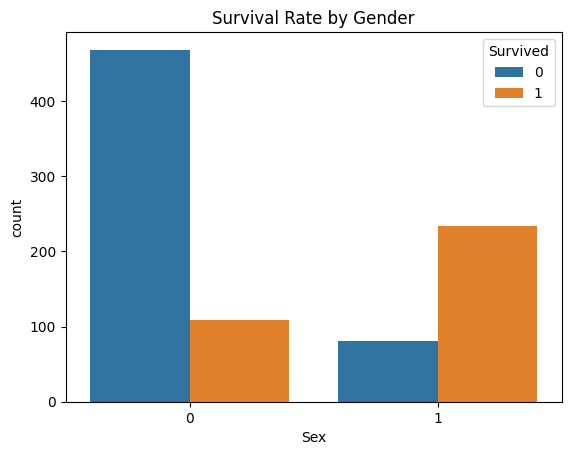

In [17]:
#Survival Rate by gender
sns.countplot(x = 'Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

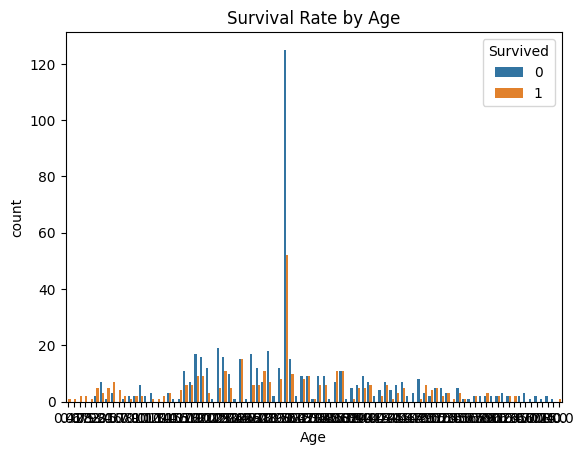

In [18]:
# survival Rate by Age
sns.countplot(x = 'Age', hue='Survived', data = df)
plt.title('Survival Rate by Age')
plt.show()

Text(0.5, 1.0, 'Age Distribution of passengers')

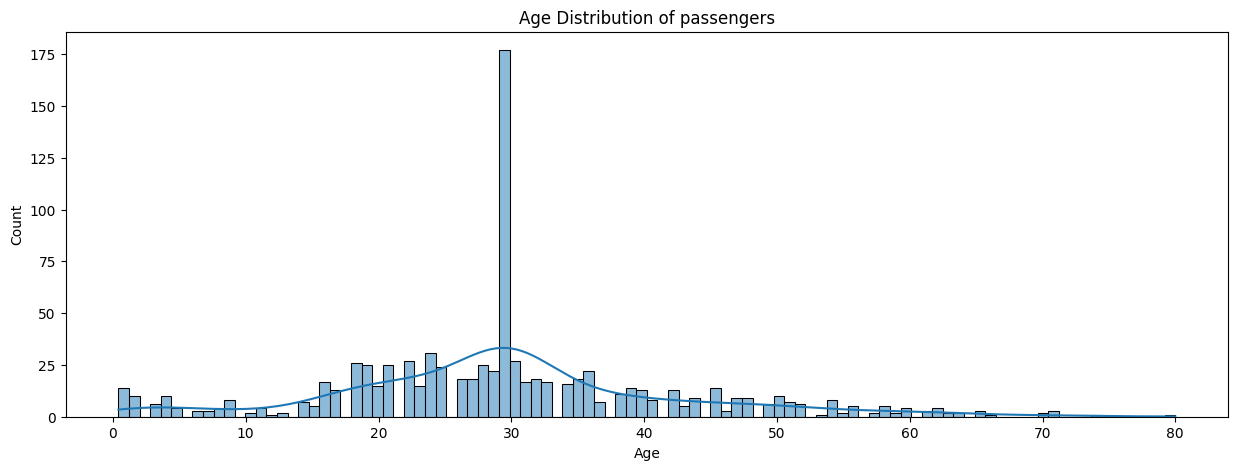

In [19]:
plt.figure(figsize = (15,5))
sns.histplot(df['Age'], bins=100, kde = True)
plt.title('Age Distribution of passengers')

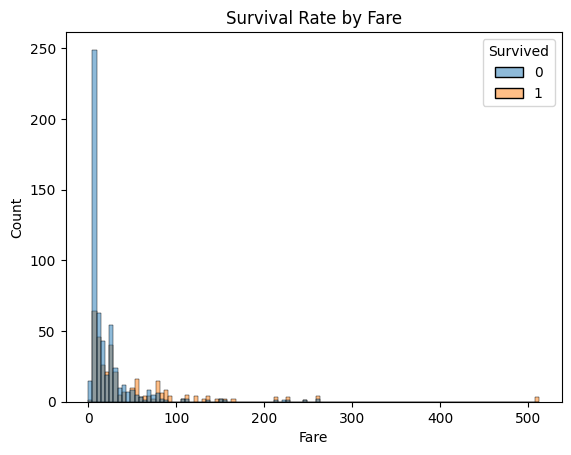

In [20]:
sns.histplot(x='Fare', hue='Survived', data=df)
plt.title('Survival Rate by Fare')
plt.show()

In [21]:
X = df [['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked']]
y = df ['Survived']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
df_classifier = DecisionTreeClassifier()

In [24]:
df_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
predicted_value = df_classifier.predict(X_test)

In [27]:
accuracy_score(predicted_value, y_test)

0.7988826815642458

In [29]:
acc =accuracy_score(predicted_value, y_test)
cm = confusion_matrix(predicted_value, y_test)
cr = classification_report(predicted_value, y_test)

In [30]:
print(f'Accuracy: {acc}')
print(f'\nConfusion Matrix:\n {cm}')
print(f'\nClassification Report:\n {cr}')

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[87 18]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
import pickle
writebinay = open('titanicpickle.pkl','wb')
pickle.dump(df_classifier,writebinary)
writebaniry